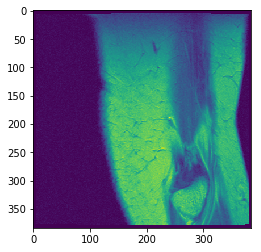

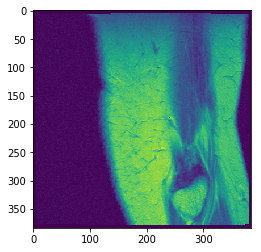

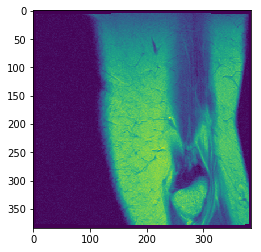

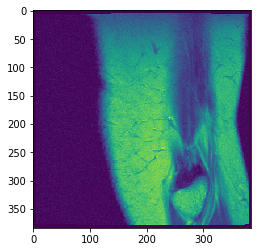

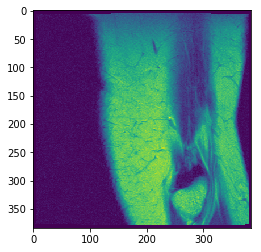

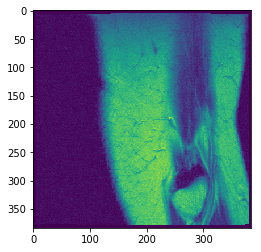

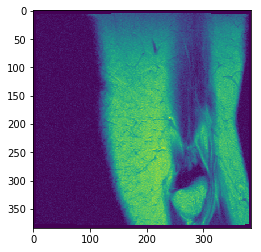

In [2]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np

dirname = "data/T2-20190624T053819Z-001/T2/"

def get_slice(filename):
    ds = pydicom.dcmread(filename)  # plan dataset
    ds.PatientName

    shape = ds.pixel_array.shape

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)

    vmax = 2697.0 # TODO -- this should be max across all images
    
    # Rescaling grey scale between 0-255
    image_2d_scaled = (np.maximum(image_2d,0) / vmax) * 255.0

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)
    return image_2d_scaled


for i in range(7):
    img = get_slice(dirname + '%03d' % (i*29+1)  )
    plt.imshow(img)
    plt.show()